In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style('darkgrid')

In [140]:
val = 0.9
off = 0.07
font = 17
lab_font = 13
capT = 0.8
bar_width = 0.4
palette = sns.color_palette("brg")

metrics = ['accuracy',
'recall',
'precision',
'f1']

# plt.title('DNN')
# sns.barplot(x=, y=, palette=palette, width=bar_width)
# plt.errorbar(mods, F1_ALL_T[0], yerr=F1_STD_ALL_T[0], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
# plt.yticks(np.arange(val, 1.01, 0.1))
# plt.ylim(val, 1)
# plt.xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

In [141]:
df = pd.read_csv('IML_DATA.csv')

In [142]:
df.shape

(179, 13)

In [143]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Slip Detection,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,DNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,​,​1,2,3,4,5,Mean,Std Dev,NaN,NaN,NaN,NaN,NaN
2,Accuracy​,0.985761561,​0.9852825916572324,​0.9841940259514065,0.984150483,0.985630933,0.985180992,0.000894834,NaN,NaN,NaN,NaN,NaN
3,Precision​,0.947478294,0.973144127,​0.9658341934579922,0.949393412,0.956822487,0.95670958,0.011674046,NaN,NaN,NaN,NaN,NaN
4,F_score​,0.947106976,​0.9418166771722591,​0.9378643116893338,0.939940717,0.94533389,0.944127194,0.003732413,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,NaN,T + 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Accuracy,0.94550293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Precision,0.661668467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,F_score,0.651098815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


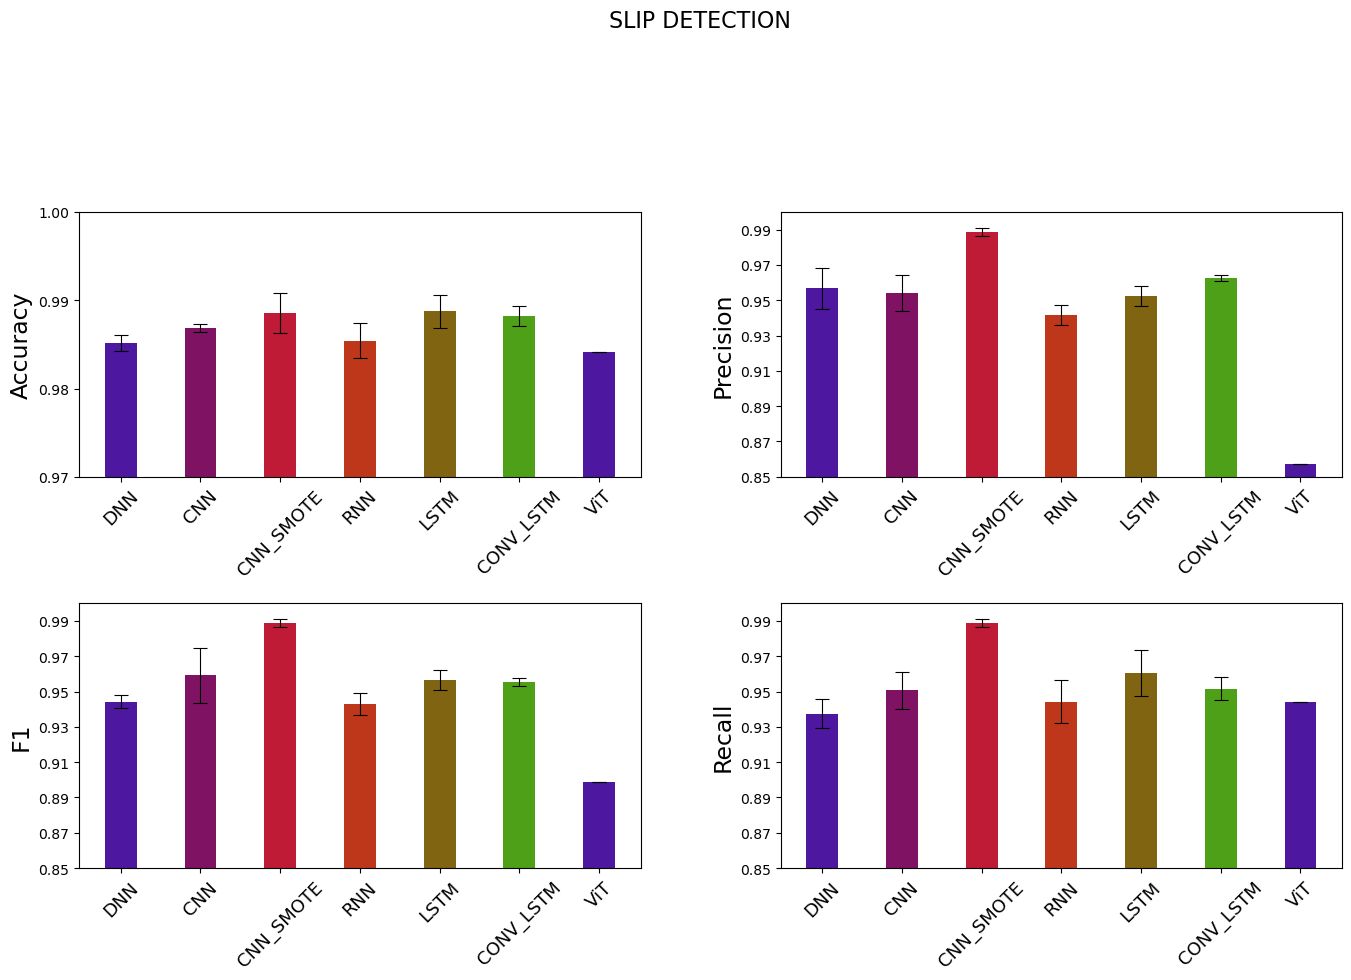

In [144]:
DNN = df['Unnamed: 6'].iloc[2:6].values.astype('float64')
CNN = df['Unnamed: 6'].iloc[8:12].values.astype('float64')
CNN_SMOTE = df['Unnamed: 6'].iloc[14:18].values.astype('float64')
RNN = df['Unnamed: 6'].iloc[20:24].values.astype('float64')
LSTM = df['Unnamed: 6'].iloc[26:30].values.astype('float64')
CONV_LSTM = df['Unnamed: 6'].iloc[32:36].values.astype('float64')
VIT = df['Unnamed: 1'].iloc[155:159].values.astype('float64')


DNN_STD = df['Unnamed: 7'].iloc[2:6].values.astype('float64')
CNN_STD = df['Unnamed: 7'].iloc[8:12].values.astype('float64')
CNN_SMOTE_STD = df['Unnamed: 7'].iloc[14:18].values.astype('float64')
RNN_STD = df['Unnamed: 7'].iloc[20:24].values.astype('float64')
LSTM_STD = df['Unnamed: 7'].iloc[26:30].values.astype('float64')
CONV_LSTM_STD = df['Unnamed: 7'].iloc[32:36].values.astype('float64')
VIT_STD = np.array([0, 0, 0, 0], 'float64')


MOD = [DNN, CNN, CNN_SMOTE, RNN, LSTM, CONV_LSTM, VIT]
MOD_STD = [DNN_STD, CNN_STD, CNN_SMOTE_STD, RNN_STD, LSTM_STD, CONV_LSTM_STD, VIT_STD]
mods = ['DNN', 'CNN', 'CNN_SMOTE', 'RNN', 'LSTM', 'CONV_LSTM', 'ViT']

ACC = [i[0] for i in MOD]
PREC = [i[1] for i in MOD]
F1= [i[2] for i in MOD]
RECALL = [i[3] for i in MOD]

ACC_STD = [i[0] for i in MOD_STD]
PREC_STD = [i[1] for i in MOD_STD]
F1_STD= [i[2] for i in MOD_STD]
RECALL_STD = [i[3] for i in MOD_STD]

val = 0.85
off = 0.12
font = 17
lab_font = 13
capT = 0.8
bar_width = 0.4
# palette = sns.color_palette("Set1")
# palette = sns.color_palette("YlOrRd")
palette = sns.color_palette("brg")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('SLIP DETECTION', fontsize=16)
fig.tight_layout(pad=7)

sns.barplot(x=mods, y=ACC, palette=palette, ax=ax1,  width=bar_width)
ax1.errorbar(mods, ACC, yerr=ACC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax1.set_yticks(np.arange(val+off, 1, 0.01))
ax1.set_ylabel('Accuracy', fontsize=font)
ax1.set_ylim(val+off, 1)
ax1.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

# ax1.title('Precision vs classification model (SLIP DETECTION)')
sns.barplot(x=mods, y=PREC, palette=palette, ax=ax2,  width=bar_width)
ax2.errorbar(mods, PREC, yerr=PREC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax2.set_yticks(np.arange(val, 1.02, 0.02))
ax2.set_ylabel('Precision', fontsize=font)
ax2.set_ylim(val, 1)
ax2.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


# ax1.title('F-score vs classification model (SLIP DETECTION)')
sns.barplot(x=mods, y=F1, palette=palette, ax=ax3,  width=bar_width)
ax3.errorbar(mods, F1, yerr=F1_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax3.set_yticks(np.arange(val, 1.02, 0.02))
ax3.set_ylabel('F1', fontsize=font)
ax3.set_ylim(val, 1)
ax3.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


# ax1.title('Recall vs classification model (SLIP DETECTION)')
sns.barplot(x=mods, y=RECALL, palette=palette, ax=ax4,  width=bar_width)
ax4.errorbar(mods, RECALL, yerr=RECALL_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax4.set_yticks(np.arange(val, 1.02, 0.02))
ax4.set_ylabel('Recall', fontsize=font)
ax4.set_ylim(val, 1)
ax4.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

plt.show()

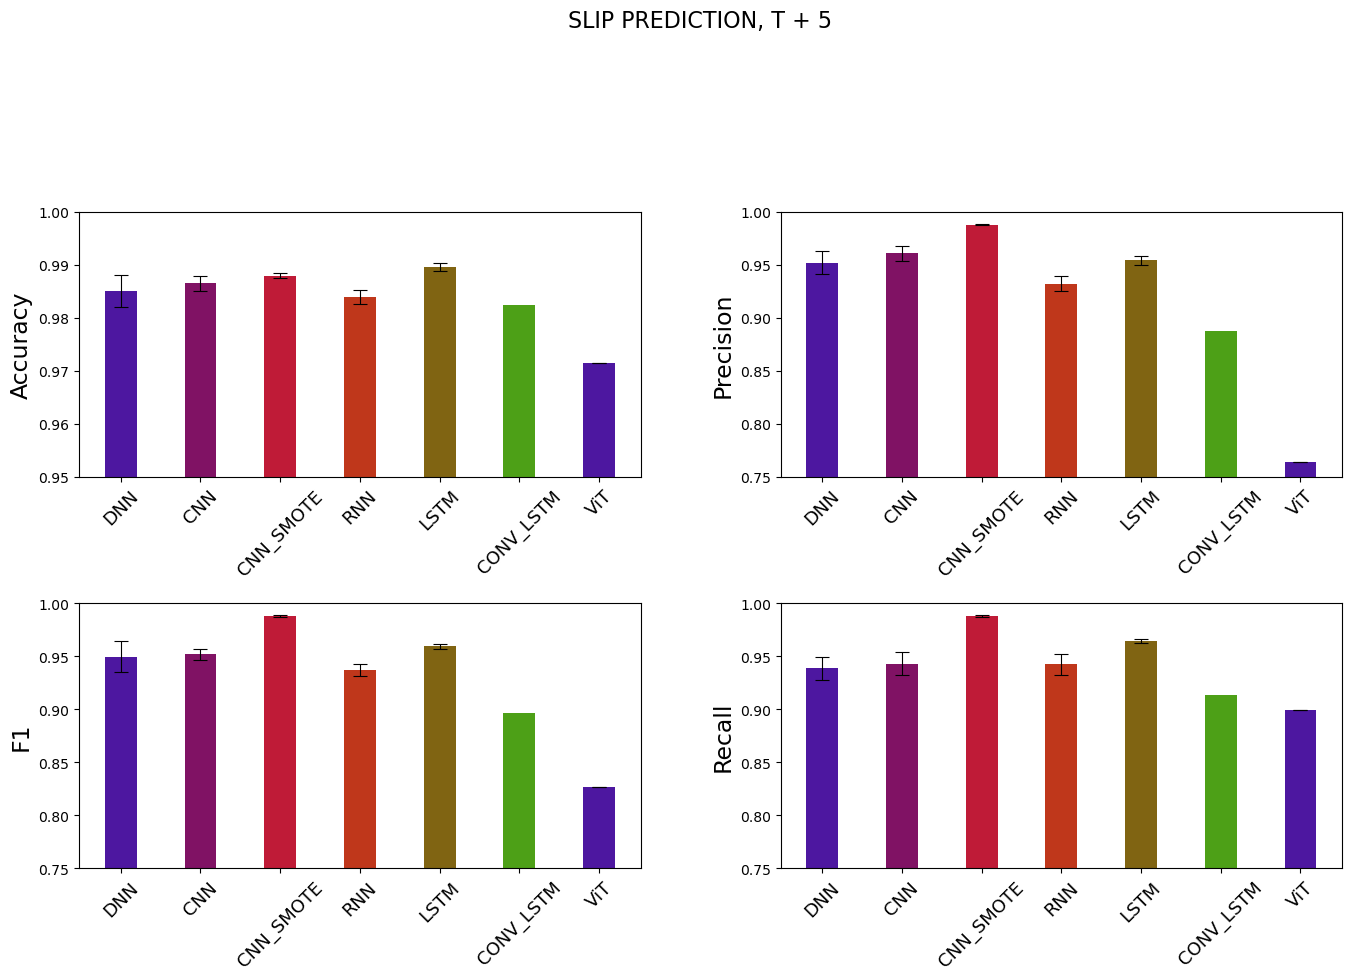

In [145]:
# T + 5

DNN = df['Unnamed: 6'].iloc[40:44].values.astype('float64')
CNN = df['Unnamed: 6'].iloc[65:69].values.astype('float64')
CNN_SMOTE = df['Unnamed: 11'].iloc[65:69].values.astype('float64')
RNN = df['Unnamed: 6'].iloc[90:94].values.astype('float64')
LSTM = df['Unnamed: 6'].iloc[112:116].values.astype('float64')
CONV_LSTM = df['Unnamed: 1'].iloc[134:138].values.astype('float64')
VIT = df['Unnamed: 1'].iloc[160:164].values.astype('float64')


DNN_STD = df['Unnamed: 7'].iloc[40:44].values.astype('float64')
CNN_STD = df['Unnamed: 7'].iloc[65:69].values.astype('float64')
CNN_SMOTE_STD = df['Unnamed: 12'].iloc[65:69].values.astype('float64')
RNN_STD = df['Unnamed: 7'].iloc[90:94].values.astype('float64')
LSTM_STD = df['Unnamed: 7'].iloc[112:116].values.astype('float64')
CONV_LSTM_STD = df['Slip Detection'].iloc[134:138].values.astype('float64')
VIT_STD = np.array([0, 0, 0, 0], 'float64')

MOD = [DNN, CNN, CNN_SMOTE, RNN, LSTM, CONV_LSTM, VIT]
MOD_STD = [DNN_STD, CNN_STD, CNN_SMOTE_STD, RNN_STD, LSTM_STD, CONV_LSTM_STD, VIT_STD]
mods = ['DNN', 'CNN', 'CNN_SMOTE', 'RNN', 'LSTM', 'CONV_LSTM', 'ViT']

ACC = [i[0] for i in MOD]
PREC = [i[1] for i in MOD]
F1_5= [i[2] for i in MOD]
RECALL = [i[3] for i in MOD]

ACC_STD = [i[0] for i in MOD_STD]
PREC_STD = [i[1] for i in MOD_STD]
F1_STD_5= [i[2] for i in MOD_STD]
RECALL_STD = [i[3] for i in MOD_STD]


val = 0.75
off = 0.2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('SLIP PREDICTION, T + 5', fontsize=16)
fig.tight_layout(pad=7)

sns.barplot(x=mods, y=ACC, palette=palette, ax=ax1,  width=bar_width)
ax1.errorbar(mods, ACC, yerr=ACC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax1.set_yticks(np.arange(val+off, 1.01, 0.01))
ax1.set_ylabel('Accuracy', fontsize=font)
ax1.set_ylim(val+off, 1)
ax1.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

# ax1.title('Precision vs classification model (SLIP PREDICTION, T + 5)')
sns.barplot(x=mods, y=PREC, palette=palette, ax=ax2,  width=bar_width)
ax2.errorbar(mods, PREC, yerr=PREC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax2.set_yticks(np.arange(val, 1.02, 0.05))
ax2.set_ylabel('Precision', fontsize=font)
ax2.set_ylim(val, 1)
ax2.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


# ax1.title('F-score vs classification model (SLIP DETECTION)')
sns.barplot(x=mods, y=F1_5, palette=palette, ax=ax3,  width=bar_width)
ax3.errorbar(mods, F1_5, yerr=F1_STD_5, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax3.set_yticks(np.arange(val, 1.02, 0.05))
ax3.set_ylabel('F1', fontsize=font)
ax3.set_ylim(val, 1)
ax3.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


# ax1.title('Recall vs classification model (SLIP DETECTION)')
sns.barplot(x=mods, y=RECALL, palette=palette, ax=ax4,  width=bar_width)
ax4.errorbar(mods, RECALL, yerr=RECALL_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax4.set_yticks(np.arange(val, 1.02, 0.05))
ax4.set_ylabel('Recall', fontsize=font)
ax4.set_ylim(val, 1)
ax4.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

plt.show()

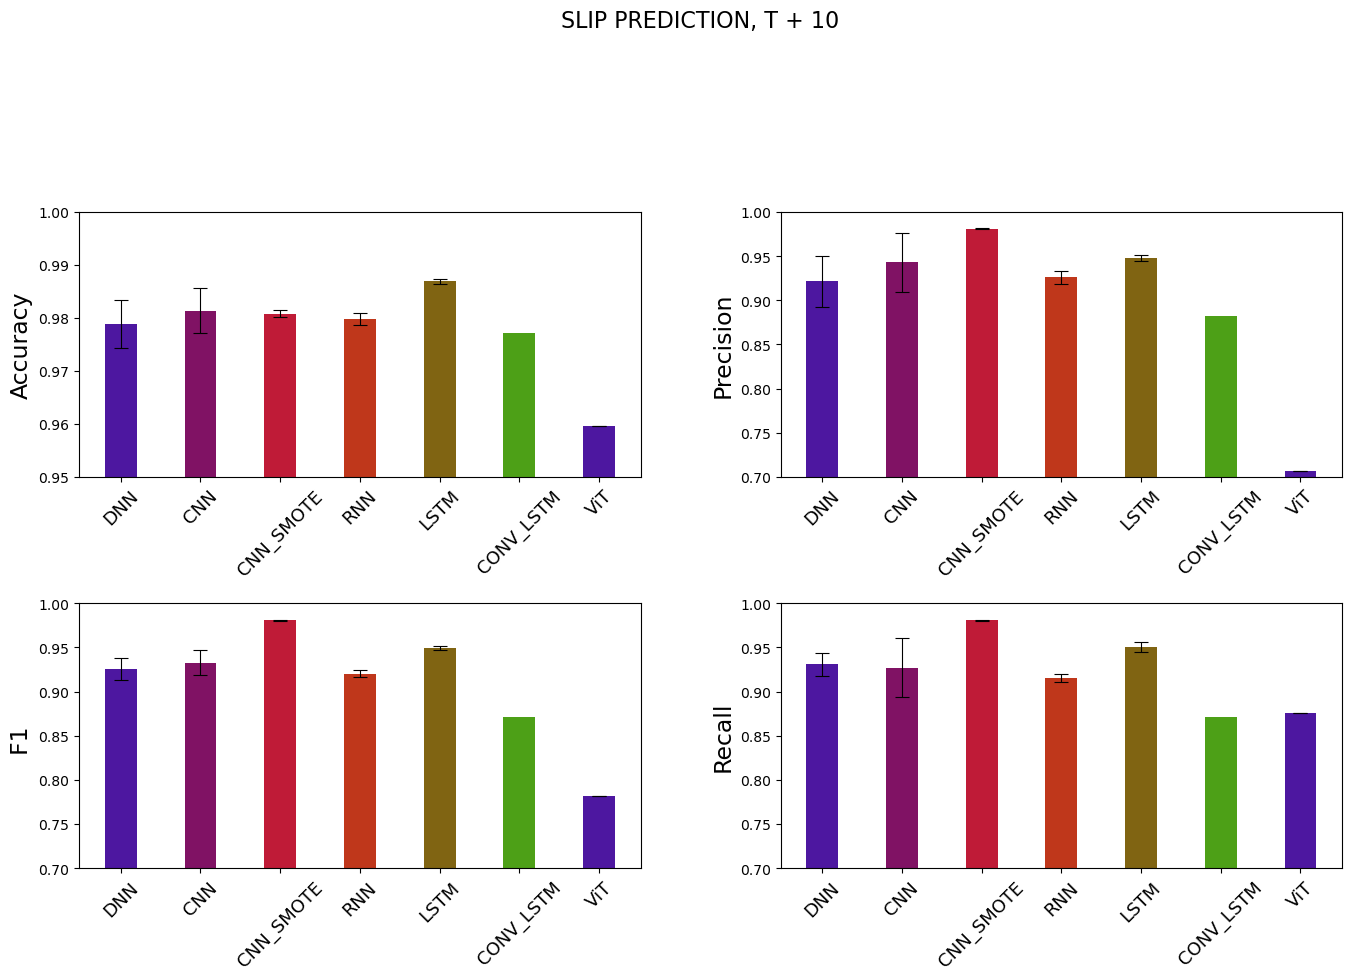

In [146]:
#T + 10

DNN = df['Unnamed: 6'].iloc[46:50].values.astype('float64')
CNN = df['Unnamed: 6'].iloc[71:75].values.astype('float64')
CNN_SMOTE = df['Unnamed: 11'].iloc[71:75].values.astype('float64')
RNN = df['Unnamed: 6'].iloc[95:99].values.astype('float64')
LSTM = df['Unnamed: 6'].iloc[117:121].values.astype('float64')
CONV_LSTM = df['Unnamed: 1'].iloc[139:143].values.astype('float64')
VIT = df['Unnamed: 1'].iloc[165:169].values.astype('float64')


DNN_STD = df['Unnamed: 7'].iloc[46:50].values.astype('float64')
CNN_STD = df['Unnamed: 7'].iloc[71:75].values.astype('float64')
CNN_SMOTE_STD = df['Unnamed: 12'].iloc[71:75].values.astype('float64')
RNN_STD = df['Unnamed: 7'].iloc[95:99].values.astype('float64')
LSTM_STD = df['Unnamed: 7'].iloc[117:121].values.astype('float64')
CONV_LSTM_STD = df['Slip Detection'].iloc[139:143].values.astype('float64')
VIT_STD = np.array([0, 0, 0, 0], 'float64')

MOD = [DNN, CNN, CNN_SMOTE, RNN, LSTM, CONV_LSTM, VIT]
MOD_STD = [DNN_STD, CNN_STD, CNN_SMOTE_STD, RNN_STD, LSTM_STD, CONV_LSTM_STD, VIT_STD]
mods = ['DNN', 'CNN', 'CNN_SMOTE', 'RNN', 'LSTM', 'CONV_LSTM', 'ViT']

ACC = [i[0] for i in MOD]
PREC = [i[1] for i in MOD]
F1_10= [i[2] for i in MOD]
RECALL = [i[3] for i in MOD]

ACC_STD = [i[0] for i in MOD_STD]
PREC_STD = [i[1] for i in MOD_STD]
F1_STD_10= [i[2] for i in MOD_STD]
RECALL_STD = [i[3] for i in MOD_STD]

val = 0.7
off = 0.25

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('SLIP PREDICTION, T + 10', fontsize=16)
fig.tight_layout(pad=7)

sns.barplot(x=mods, y=ACC, palette=palette, ax=ax1,  width=bar_width)
ax1.errorbar(mods, ACC, yerr=ACC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax1.set_yticks(np.arange(val+off, 1.01, 0.01))
ax1.set_ylabel('Accuracy', fontsize=font)
ax1.set_ylim(val+off, 1)
ax1.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

# ax1.title('Precision vs classification model (SLIP PREDICTION, T + 5)')
sns.barplot(x=mods, y=PREC, palette=palette, ax=ax2,  width=bar_width)
ax2.errorbar(mods, PREC, yerr=PREC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax2.set_yticks(np.arange(val, 1.02, 0.05))
ax2.set_ylabel('Precision', fontsize=font)
ax2.set_ylim(val, 1)
ax2.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


sns.barplot(x=mods, y=F1_10, palette=palette, ax=ax3,  width=bar_width)
ax3.errorbar(mods, F1_10, yerr=F1_STD_10, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax3.set_yticks(np.arange(val, 1.02, 0.05))
ax3.set_ylabel('F1 ', fontsize=font)
ax3.set_ylim(val, 1)
ax3.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


sns.barplot(x=mods, y=RECALL, palette=palette, ax=ax4,  width=bar_width)
ax4.errorbar(mods, RECALL, yerr=RECALL_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax4.set_yticks(np.arange(val, 1.02, 0.05))
ax4.set_ylabel('Recall', fontsize=font)
ax4.set_ylim(val, 1)
ax4.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

plt.show()

In [147]:
df['Slip Detection'].iloc[144:148].values

array([nan, nan, nan, nan], dtype=object)

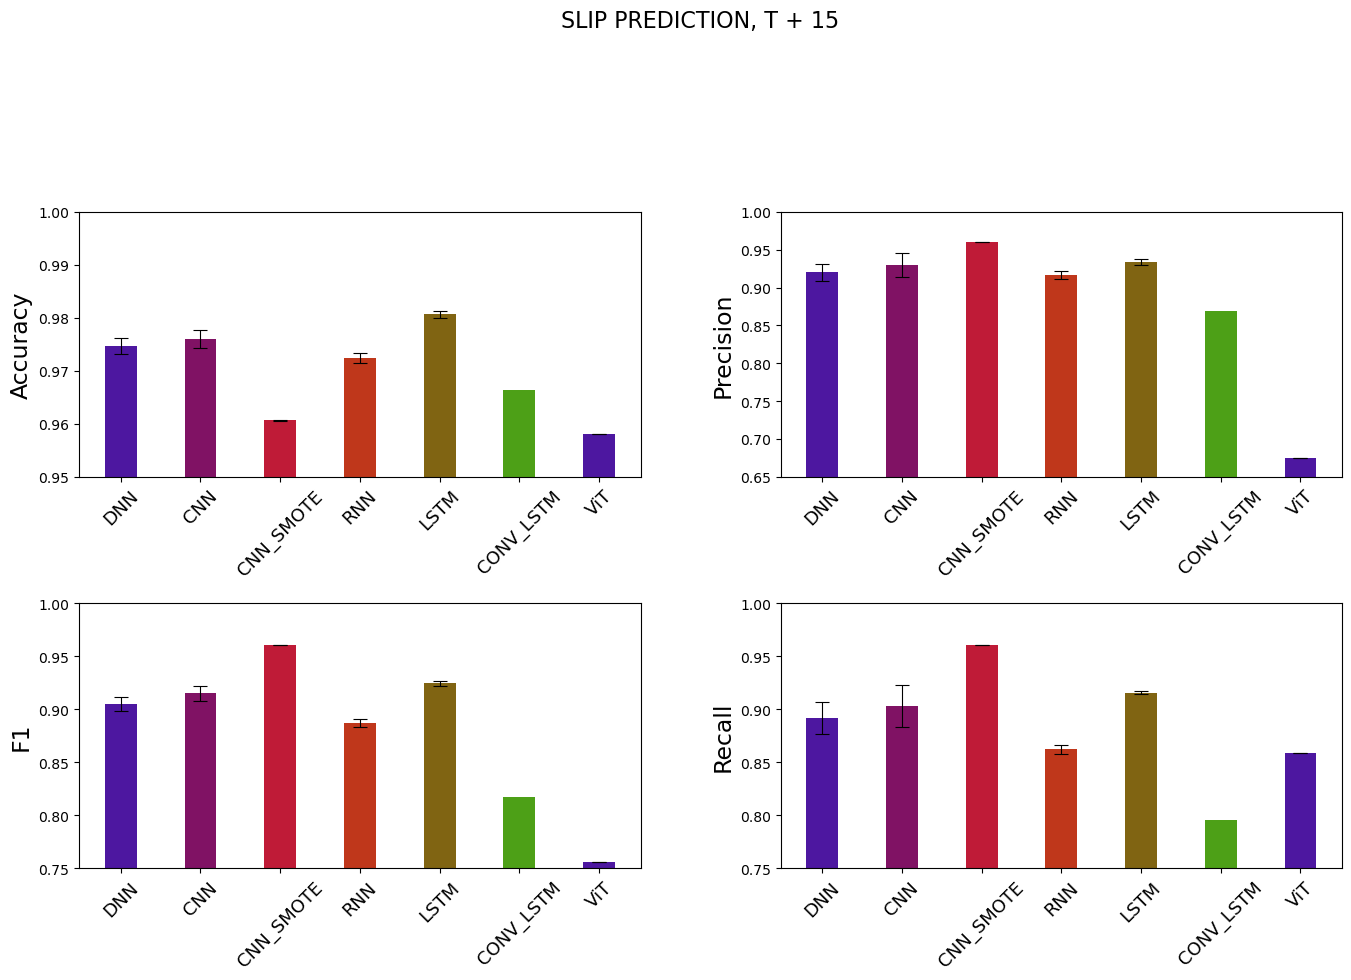

In [148]:
# T + 15

DNN = df['Unnamed: 6'].iloc[52:56].values.astype('float64')
CNN = df['Unnamed: 6'].iloc[77:81].values.astype('float64')
CNN_SMOTE = df['Unnamed: 11'].iloc[77:81].values.astype('float64')
RNN = df['Unnamed: 6'].iloc[100:104].values.astype('float64')
LSTM = df['Unnamed: 6'].iloc[122:126].values.astype('float64')
CONV_LSTM = df['Unnamed: 1'].iloc[144:148].values.astype('float64')
VIT = df['Unnamed: 1'].iloc[170:174].values.astype('float64')


DNN_STD = df['Unnamed: 7'].iloc[52:56].values.astype('float64')
CNN_STD = df['Unnamed: 7'].iloc[77:81].values.astype('float64')
CNN_SMOTE_STD = df['Unnamed: 12'].iloc[77:81].values.astype('float64')
RNN_STD = df['Unnamed: 7'].iloc[100:104].values.astype('float64')
LSTM_STD = df['Unnamed: 7'].iloc[122:126].values.astype('float64')
CONV_LSTM_STD = df['Slip Detection'].iloc[144:148].values.astype('float64')
VIT_STD = np.array([0, 0, 0, 0], 'float64')

MOD = [DNN, CNN, CNN_SMOTE, RNN, LSTM, CONV_LSTM, VIT]
MOD_STD = [DNN_STD, CNN_STD, CNN_SMOTE_STD, RNN_STD, LSTM_STD, CONV_LSTM_STD, VIT_STD]
mods = ['DNN', 'CNN', 'CNN_SMOTE', 'RNN', 'LSTM', 'CONV_LSTM', 'ViT']

ACC = [i[0] for i in MOD]
PREC = [i[1] for i in MOD]
F1_15= [i[2] for i in MOD]
RECALL = [i[3] for i in MOD]

ACC_STD = [i[0] for i in MOD_STD]
PREC_STD = [i[1] for i in MOD_STD]
F1_STD_15= [i[2] for i in MOD_STD]
RECALL_STD = [i[3] for i in MOD_STD]



val = 0.75
off = 0.2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('SLIP PREDICTION, T + 15', fontsize=16)
fig.tight_layout(pad=7)

sns.barplot(x=mods, y=ACC, palette=palette, ax=ax1,  width=bar_width)
ax1.errorbar(mods, ACC, yerr=ACC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax1.set_yticks(np.arange(val+off, 1.01, 0.01))
ax1.set_ylabel('Accuracy', fontsize=font)
ax1.set_ylim(val+off, 1)
ax1.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

sns.barplot(x=mods, y=PREC, palette=palette, ax=ax2,  width=bar_width)
ax2.errorbar(mods, PREC, yerr=PREC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax2.set_yticks(np.arange(val-0.1, 1.02, 0.05))
ax2.set_ylabel('Precision', fontsize=font)
ax2.set_ylim(val-0.1, 1)
ax2.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


sns.barplot(x=mods, y=F1_15, palette=palette, ax=ax3,  width=bar_width)
ax3.errorbar(mods, F1_15, yerr=F1_STD_15, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax3.set_yticks(np.arange(val, 1.02, 0.05))
ax3.set_ylabel('F1', fontsize=font)
ax3.set_ylim(val, 1)
ax3.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


sns.barplot(x=mods, y=RECALL, palette=palette, ax=ax4,  width=bar_width)
ax4.errorbar(mods, RECALL, yerr=RECALL_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax4.set_yticks(np.arange(val, 1.02, 0.05))
ax4.set_ylabel('Recall', fontsize=font)
ax4.set_ylim(val, 1)
ax4.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

plt.show()

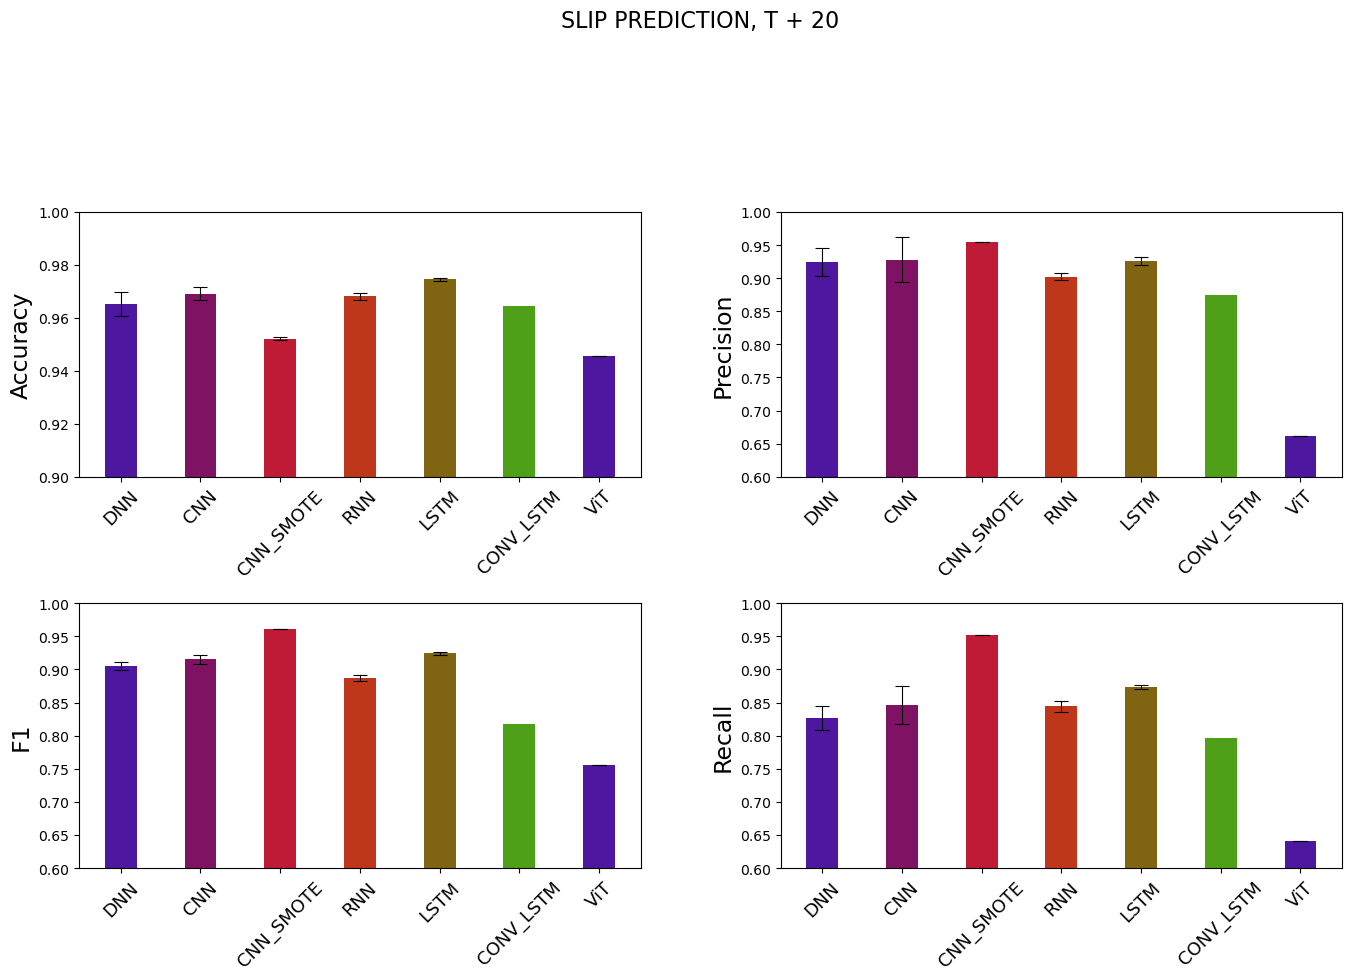

In [149]:
# T + 20


DNN = df['Unnamed: 6'].iloc[58:62].values.astype('float64')
CNN = df['Unnamed: 6'].iloc[83:87].values.astype('float64')
CNN_SMOTE = df['Unnamed: 11'].iloc[83:87].values.astype('float64')
RNN = df['Unnamed: 6'].iloc[105:109].values.astype('float64')
LSTM = df['Unnamed: 6'].iloc[127:131].values.astype('float64')
CONV_LSTM = df['Unnamed: 1'].iloc[149:153].values.astype('float64')
VIT = df['Unnamed: 1'].iloc[175:179].values.astype('float64')


DNN_STD = df['Unnamed: 7'].iloc[58:62].values.astype('float64')
CNN_STD = df['Unnamed: 7'].iloc[83:87].values.astype('float64')
CNN_SMOTE_STD = df['Unnamed: 12'].iloc[83:87].values.astype('float64')
RNN_STD = df['Unnamed: 7'].iloc[105:109].values.astype('float64')
LSTM_STD = df['Unnamed: 7'].iloc[127:131].values.astype('float64')
CONV_LSTM_STD = df['Slip Detection'].iloc[149:153].values.astype('float64')
VIT_STD = np.array([0, 0, 0, 0], 'float64')

MOD = [DNN, CNN, CNN_SMOTE, RNN, LSTM, CONV_LSTM, VIT]
MOD_STD = [DNN_STD, CNN_STD, CNN_SMOTE_STD, RNN_STD, LSTM_STD, CONV_LSTM_STD, VIT_STD]
mods = ['DNN', 'CNN', 'CNN_SMOTE', 'RNN', 'LSTM', 'CONV_LSTM', 'ViT']

ACC = [i[0] for i in MOD]
PREC = [i[1] for i in MOD]
F1_20= [i[2] for i in MOD]
RECALL = [i[3] for i in MOD]

ACC_STD = [i[0] for i in MOD_STD]
PREC_STD = [i[1] for i in MOD_STD]
F1_STD_20= [i[2] for i in MOD_STD]
RECALL_STD = [i[3] for i in MOD_STD]


val = 0.6
off = 0.3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('SLIP PREDICTION, T + 20', fontsize=16)
fig.tight_layout(pad=7)

sns.barplot(x=mods, y=ACC, palette=palette, ax=ax1,  width=bar_width)
ax1.errorbar(mods, ACC, yerr=ACC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax1.set_yticks(np.arange(val+off, 1, 0.02))
ax1.set_ylabel('Accuracy', fontsize=font)
ax1.set_ylim(val+off, 1)
ax1.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

sns.barplot(x=mods, y=PREC, palette=palette, ax=ax2,  width=bar_width)
ax2.errorbar(mods, PREC, yerr=PREC_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax2.set_yticks(np.arange(val, 1.02, 0.05))
ax2.set_ylabel('Precision', fontsize=font)
ax2.set_ylim(val, 1)
ax2.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


sns.barplot(x=mods, y=F1_15, palette=palette, ax=ax3,  width=bar_width)
ax3.errorbar(mods, F1_15, yerr=F1_STD_15, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax3.set_yticks(np.arange(val, 1.02, 0.05))
ax3.set_ylabel('F1', fontsize=font)
ax3.set_ylim(val, 1)
ax3.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


sns.barplot(x=mods, y=RECALL, palette=palette, ax=ax4,  width=bar_width)
ax4.errorbar(mods, RECALL, yerr=RECALL_STD, fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax4.set_yticks(np.arange(val, 1.02, 0.05))
ax4.set_ylabel('Recall', fontsize=font)
ax4.set_ylim(val, 1)
ax4.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

plt.show()

In [150]:
F1_ALL = np.array((F1,
F1_5,
F1_10,
F1_15,
F1_20))

F1_STD_ALL = np.array((F1_STD,
F1_STD_5,
F1_STD_10,
F1_STD_15,
F1_STD_20))

In [151]:
F1_ALL_T = F1_ALL.T
F1_STD_ALL_T = F1_STD_ALL.T
F1_ALL_T.shape, F1_STD_ALL_T.shape

((7, 5), (7, 5))

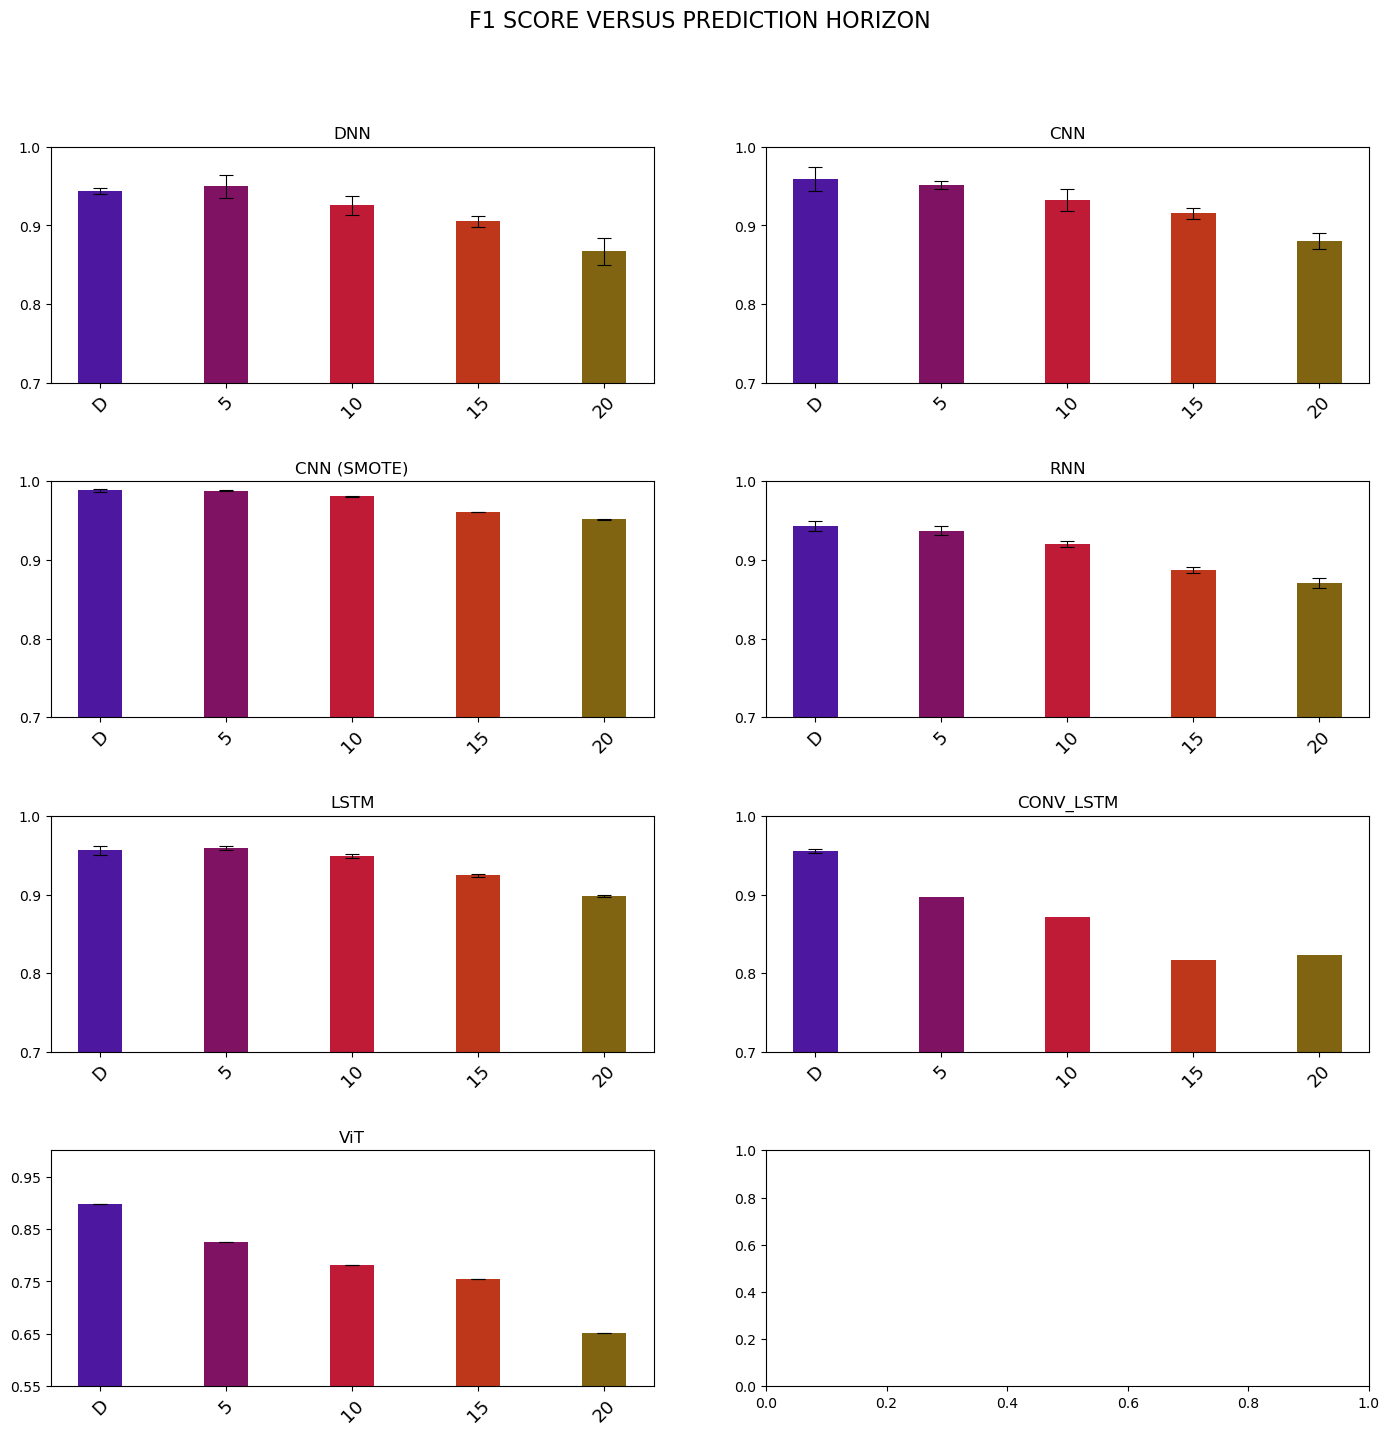

In [152]:
mods = ['D', '5', '10', '15', '20']

val = 0.7
bar_width=0.35

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(15,15))
fig.suptitle('F1 SCORE VERSUS PREDICTION HORIZON', fontsize=16)
fig.tight_layout(pad=5)

ax1.set_title('DNN')
sns.barplot(x=mods, y=F1_ALL_T[0], palette=palette, ax=ax1,  width=bar_width)
ax1.errorbar(mods, F1_ALL_T[0], yerr=F1_STD_ALL_T[0], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax1.set_yticks(np.arange(val, 1.01, 0.1))
ax1.set_ylim(val, 1)
ax1.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


ax2.set_title('CNN')
sns.barplot(x=mods, y=F1_ALL_T[1], palette=palette, ax=ax2,  width=bar_width)
ax2.errorbar(mods, F1_ALL_T[1], yerr=F1_STD_ALL_T[1], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax2.set_yticks(np.arange(val, 1.01, 0.1))
ax2.set_ylim(val, 1)
ax2.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


ax3.set_title('CNN (SMOTE)')
sns.barplot(x=mods, y=F1_ALL_T[2], palette=palette, ax=ax3,  width=bar_width)
ax3.errorbar(mods, F1_ALL_T[2], yerr=F1_STD_ALL_T[2], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax3.set_yticks(np.arange(val, 1.01, 0.1))
ax3.set_ylim(val, 1)
ax3.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)


ax4.set_title('RNN')
sns.barplot(x=mods, y=F1_ALL_T[3], palette=palette, ax=ax4,  width=bar_width)
ax4.errorbar(mods, F1_ALL_T[3], yerr=F1_STD_ALL_T[3], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax4.set_yticks(np.arange(val, 1.01, 0.1))
ax4.set_ylim(val, 1)
ax4.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

ax5.set_title('LSTM')
sns.barplot(x=mods, y=F1_ALL_T[4], palette=palette, ax=ax5,  width=bar_width)
ax5.errorbar(mods, F1_ALL_T[4], yerr=F1_STD_ALL_T[4], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax5.set_yticks(np.arange(val, 1.01, 0.1))
ax5.set_ylim(val, 1)
ax5.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

ax6.set_title('CONV_LSTM')
sns.barplot(x=mods, y=F1_ALL_T[5], palette=palette, ax=ax6,  width=bar_width)
ax6.errorbar(mods, F1_ALL_T[5], yerr=F1_STD_ALL_T[5], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax6.set_yticks(np.arange(val, 1.01, 0.1))
ax6.set_ylim(val, 1)
ax6.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

ax7.set_title('ViT')
sns.barplot(x=mods, y=F1_ALL_T[6], palette=palette, ax=ax7,  width=bar_width)
ax7.errorbar(mods, F1_ALL_T[6], yerr=F1_STD_ALL_T[6], fmt=' ', capsize=5, ecolor='black', capthick=capT, elinewidth=capT)
ax7.set_yticks(np.arange(val-.15, 1.01, 0.1))
ax7.set_ylim(val-.15, 1)
ax7.set_xticks(range(len(mods)), mods, rotation=45, fontsize=lab_font)

plt.show()